In [1]:
%%html
<style>@font-face{font-family:Vazir;src:url(Vazir.eot);src:url(Vazir.eot?#iefix) format("embedded-opentype"),url(Vazir.woff2) format("woff2"),url(Vazir.woff) format("woff"),url(Vazir.ttf) format("truetype");font-weight:400;font-style:normal}.farsi{font-family:Vazir;direction:rtl}.center{text-align:center}.justify{text-align:justify}.blue{color:blue}<style>

# <div class="farsi center">بسم الله الرحمن الرحیم</div>

## <div class = "farsi center blue">خواندن از فایل ها</div>

In [2]:
import pandas as pd
import numpy as np

MNIST_LENGTH = 28
train_label = pd.read_csv('MNIST/train_label.csv',header=None)
train_data  = pd.read_csv('MNIST/train_data.csv' ,header=None)
test_label  = pd.read_csv('MNIST/test_label.csv' ,header=None)
test_data   = pd.read_csv('MNIST/test_data.csv'  ,header=None)
np_test_label = np.array(test_label[0].values)
tests = {}

## <div class = "farsi center blue">توابع اولیه</div>

In [3]:
from PIL import Image
from matplotlib.pyplot import imshow
from sklearn.externals.six import StringIO  
from IPython.display import Image as IPyImage
from IPython.display import display, HTML
import pydotplus
import matplotlib.pylab as plt

def vector_to_arr(img_vec):
    return np.array([img_vec[i*MNIST_LENGTH:(i+1)*MNIST_LENGTH]for i in range(MNIST_LENGTH)]).T.tolist()
def print_img(img_arr):
    img = Image.new( 'RGB', (MNIST_LENGTH,MNIST_LENGTH))
    pixels = img.load()
    for i in range(img.size[0]):
        for j in range(img.size[1]):
            pixels[i,j] = (img_arr[i][j],img_arr[i][j],img_arr[i][j])
    imshow(np.asarray(img))
def calc_grade(perdicts,key = None,source = np_test_label):
    if key is not None:
        temp = [0]*len(np_test_label)
        for i in range(len(np_test_label)):
            if perdicts[i] == np_test_label[i]:
                temp[i] = 1
        tests[key] = temp
    np_source = np.array(source)
    np_perdicts = np.array(perdicts)
    return np.count_nonzero(np_perdicts==np_source)/len(np_source)
def print_tree(inp,depth = None):
    dot_data = StringIO()
    tree.export_graphviz(inp, out_file=dot_data,
                    filled=True, rounded=True,
                    special_characters=True,max_depth = depth)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return graph.create_png()
def draw_plot(inp):
    lists = inp.items()
    x, y = zip(*lists)
    plt.plot(x, y)
    plt.xticks(np.arange(min(inp),max(inp), 1)) 
    plt.show()
def fix_kmeans(predicted,n_clusters):
    counter = [[0]*10 for i in range(n_clusters)]
    for index in range(len(predicted)):
        counter[predicted[index]][train_label[0].values[index]]+=1
    for i in range(len(counter)):
        counter[i] = counter[i].index(max(counter[i]))
    return counter
def fix_kmeans_result(predicted,means):
    for i in range(len(predicted)):
        predicted[i] = means[predicted[i]]
    return predicted

## <div class = "farsi center blue">پرینت یکان شماره دانشجویی</div>

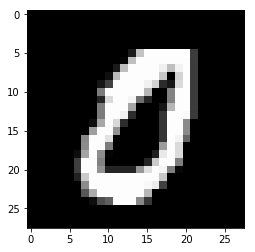

In [4]:
i = 10
print_img(vector_to_arr(train_data.values[i]))

# <div class = "center blue">K-Nearest Neighbors</div>

<div class="farsi justify">
    ۱- در این الگوریتم یک فضای n بعدی ساخته می شود که در آن هر داده معادل یک نقطه در این فضا می شود. برای  بررسی داده جدید  k نقطه نزدیکتر به آن انتخاب می شوند و بین آن ها بررسی میشود که بیشترین جواب مشترک بین آنها چیست و این جواب به عنوان خروجی داده می شود.
<br/>
    ۲-
</div>

In [5]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier(12)
knc.fit(train_data.values,train_label[0].values)
knc_predicted = knc.predict(test_data.values)
print(calc_grade(knc_predicted,'K-Nearest Neighbors'))

0.91


<div class="farsi justify">
    ۳-
</div>

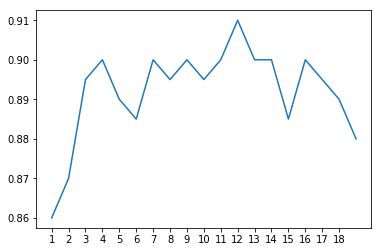

The optimal point is:12


In [6]:
results = {}
for i in range(1,20):
    temp = KNeighborsClassifier(i)
    temp.fit(train_data.values,train_label[0].values)
    results[i] = calc_grade(temp.predict(test_data.values))
draw_plot(results)
print("The optimal point is:"+str(max(results.items(), key=lambda x:x[1])[0]))

<div class="farsi justify">
    ۴-ناپایدار است چون با زیاد شدن تعداد همسایه ها هم می تواند  داده خطا به همسایه ها اضافه شود هم داده درست پس نمودار آن لزوما روند صعودی ندارد.
    <br/>
    ۵-
</div>

In [7]:
neighbors = knc.kneighbors_graph([test_data.values[50]]).toarray().tolist()[0]
nears = []
for i in range(len(neighbors)):
    if neighbors[i] > 0:
        nears.append(train_label.values[i][0])
print(nears)

[2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3]


<div class="farsi justify">
    ۶-سرعت این الگوریتم در هنگام تست کند است و هر چقدر داده های یادگیری بیشتر باشد این سرعت بدتر می شود. همچنین انتخاب k مناسب برای الگوریتم سخت است.
</div>

# <div class = "center blue">Decision Tree</div>

<div class="farsi justify">
    ۷-درخت تصمیم با ساختن یک درخت که مانند فلوچارت عمل میکند داده ها را بررسی می کند که مزیت این روش سرعت بالا در تست داده هاست.
    <br/>
    ۸-
</div>

In [8]:
from sklearn import tree
dtc = tree.DecisionTreeClassifier(max_depth = 15)
dtc.fit(train_data.values,train_label[0].values)
dtc_predicted = dtc.predict(test_data.values)
print(calc_grade(dtc_predicted,'Decision Tree'))

0.71


<div class="farsi justify">
    ۹-
</div>

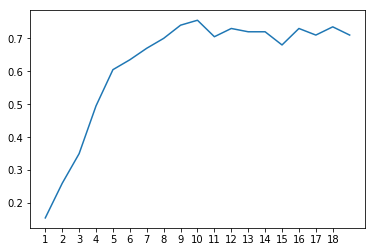

The optimal point is:10


In [9]:
results = {}
for i in range(1,20):
    temp = tree.DecisionTreeClassifier(max_depth = i)
    temp.fit(train_data.values,train_label[0].values)
    results[i] = calc_grade(temp.predict(test_data.values))
draw_plot(results)
print("The optimal point is:"+str(max(results.items(), key=lambda x:x[1])[0]))

<div class="farsi justify">
    ۱۰-
</div>

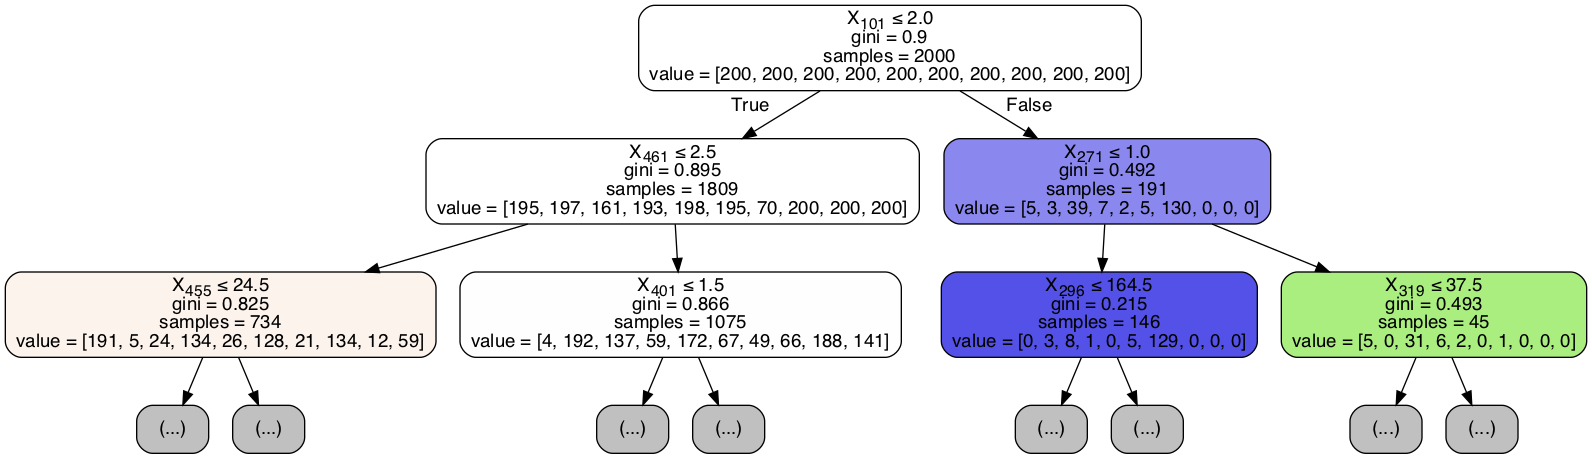

In [10]:
IPyImage(print_tree(dtc,2))

<div class="farsi justify">
    ۱۱-در صورتی که عمق درخت زیاد باشد این اتفاق می‌افتد چون تعداد شرط ها  باعث می‌شود بیش از حد به داده ترین وابسته شود و همانطور که در شکل زیر پیدا است اگر روی همان داده ترین تست انجام دهیم در حالتی که عمق بین ۲۰ یا ۳۰ باشد دقت کامل را دریافت می‌کنیم که این نشان از اورفیت است.
</div>

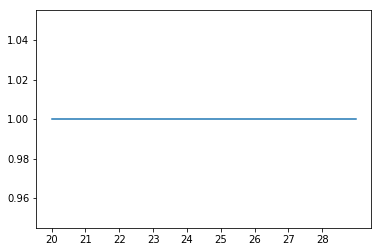

In [11]:
results = {}
for i in range(20,30):
    temp = tree.DecisionTreeClassifier(max_depth = i)
    temp.fit(train_data.values,train_label[0].values)
    results[i] = calc_grade(temp.predict(train_data.values),source = train_label[0].values)
draw_plot(results)

# <div class = "center blue">Random Forest</div>

<div class="farsi justify">
    ۱۲-
    <br/>
    ۱۳-
</div>

In [12]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100,max_depth = 3)
rfc.fit(train_data.values,train_label[0].values)
rfc_predicted = rfc.predict(test_data.values)
print(calc_grade(rfc_predicted,'Random Forest'))

0.725


<div class="farsi justify">
    ۱۴-
    <br/>
    ۱۵-
    <br/>
    ۱۶-
</div>

# <div class = "center blue">Regresion Logistica</div>

<div class="farsi justify">
    ۱۷-
    <br/>
    ۱۸-
</div>

In [13]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='liblinear', multi_class='ovr')
lr.fit(train_data.values,train_label[0].values)
lr_predicted = lr.predict(test_data.values)
print(calc_grade(lr_predicted,'Regresion Logistica'))

0.785


# <div class = "center blue">K-Means</div>

<div class="farsi justify">
    ۱۹-
    <br/>
    ۲۰-
</div>

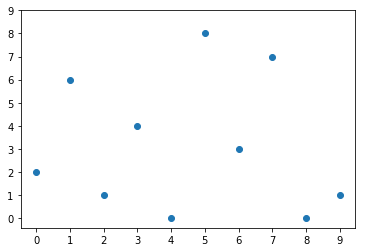

In [14]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=10)
km.fit_transform(train_data.values)
means = fix_kmeans(km.predict(train_data.values),km.n_clusters)

plt.scatter(np.arange(0,km.n_clusters,1),means)
plt.xticks(np.arange(0,km.n_clusters,1))
plt.yticks(np.arange(0,10,1));

<div class="farsi justify">
    ۲۱-
</div>

In [15]:
km_predicted = fix_kmeans_result(km.predict(test_data.values),means)
print(calc_grade(km_predicted,'K-Means'))

0.55


<div class="farsi justify">
    ۲۲-
</div>

0.835


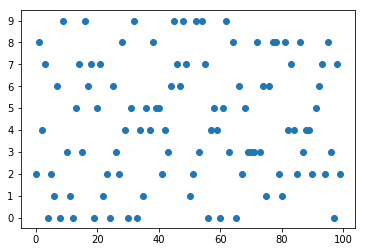

In [16]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=100)
km.fit_transform(train_data.values)
means = fix_kmeans(km.predict(train_data.values),km.n_clusters)

plt.scatter(np.arange(0,km.n_clusters,1),means)
plt.yticks(np.arange(0,10,1))
km_predicted = fix_kmeans_result(km.predict(test_data.values),means)
print(calc_grade(km_predicted,'K-Means'))

# <div class = "farsi center blue">جمع بندی</div>

<div class="farsi justify">
    ۲۴-الگوریتم knn بیشترین دقت را به ما در حالت k=12 می‌دهد. که مقدار دقت آن ۰.۹۱ است.
    <br/>
    ۲۵-
</div>

In [17]:
confusion_matrix = {i:[0]*10 for i in range(10)}
for i in range(len(knc_predicted)):
    confusion_matrix[knc_predicted[i]][np_test_label[i]]+=1
confusion_matrix = pd.DataFrame.from_dict(confusion_matrix)
confusion_matrix.loc['Total',:]= confusion_matrix.sum(axis=0)
confusion_matrix.loc[:,'Total'] = confusion_matrix.sum(axis=1)
pd.options.display.float_format = '{:,.0f}'.format
display(confusion_matrix)

,0,1,2,3,4,5,6,7,8,9,Total
0,16,0,0,0,0,0,0,0,0,0,16
1,0,25,0,0,0,0,0,0,0,0,25
2,0,2,23,0,0,0,0,2,0,0,27
3,0,1,0,15,0,0,0,0,0,0,16
4,0,0,0,0,18,0,0,0,0,1,19
5,0,0,0,0,0,11,0,0,0,1,12
6,0,2,0,0,2,0,24,0,0,0,28
7,0,3,0,0,0,0,0,17,0,1,21
8,0,0,0,0,0,0,0,1,18,0,19
9,0,0,0,1,0,0,1,0,0,15,17


<div class="farsi justify">
    ۲۶-
</div>

In [18]:
def calc_dif_grade(inp):
    ret = [0,0]
    for key,value in inp.items():
        ret[value] += 1
    return ret[0]*ret[1]
df = pd.DataFrame.from_dict(tests)
row = df.apply(lambda x:calc_dif_grade(x),axis=1).idxmax()
display(df.loc[row].to_frame())

,2
K-Nearest Neighbors,1
Decision Tree,1
Random Forest,0
Regresion Logistica,0
K-Means,1


# <div class = "farsi center blue">کاهش ابعاد بردار ویژگی‌ها</div>